   **AGABA LUCKY**
 **2024/HD05/21913U **

In [ ]:
# importing the necessary basic libraries
import numpy as np             # For numerical operations
import pandas as pd            # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns          # For statistical data visualization

# Machine Learning Libraries
from sklearn.model_selection import train_test_split     # For splitting datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # For feature scaling and encoding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # For model evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Popular ML models
from sklearn.linear_model import LinearRegression, LogisticRegression # Common linear models
from sklearn.svm import SVC                            # Support Vector Classifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # For hyperparameter tuning

Load the dataset

In [ ]:
# Load the uploaded combined dataset to explore its contents
file_path = '/content/combined_dataset.csv'
combined_df = pd.read_csv(file_path)

In [ ]:
#check for the first five rows of the dataset
combined_df.head()

,time,input_voltage,el_power
0,810.07028,10.0,1228.791720
1,811.06938,10.0,1223.041745
2,812.06848,10.0,1244.960866
3,813.06758,10.0,1229.259058
4,814.06668,10.0,1248.117024


In [ ]:
#check for the last five rows of the dataset
combined_df.tail()

,time,input_voltage,el_power
52935,10574.74,3.0,1180.509030
52936,10575.96,3.0,1085.497428
52937,10577.16,3.0,1184.384535
52938,10578.40,3.0,1082.038939
52939,10579.60,3.0,1177.770547


In [ ]:
#check for the number of rows and columns in the dataset
combined_df.shape

(52940, 3)

In [ ]:
#check for the columns together with their datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52940 entries, 0 to 52939
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           52940 non-null  float64
 1   input_voltage  52940 non-null  float64
 2   el_power       52940 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [ ]:
#check for the number of unique elements in the dataset
combined_df.nunique()

,0
time,51706
input_voltage,34
el_power,52940


In [ ]:
#obtain a summary of the dataset/ descriptive statistics
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,52940.0,5606.444209,2960.330233,810.00000,3086.9300,5431.033890,7782.301370,12636.840000
input_voltage,52940.0,5.505534,2.549721,3.00000,3.0000,4.842105,7.421053,10.000000
el_power,52940.0,1843.315949,723.126377,932.83726,1205.7439,1605.753998,2399.419112,3249.891217


In [ ]:
#checking for missing values
combined_df.isnull().sum()

,0
time,0
input_voltage,0
el_power,0


In [ ]:
#checking for duplicates in the dataset
combined_df.duplicated().sum()

0

In [ ]:
#checking for garbage values
for i in combined_df.select_dtypes(include='object').columns:
  print(combined_df[i].value_counts())
  print("***"*10)

Exploratory Data Analysis (EDA) on the dataset

In [ ]:
# Set plot style for consistent visuals
sns.set(style="whitegrid")

Univariate Analysis: Summary statistics and visualizations for 'input_voltage' and 'el_power'

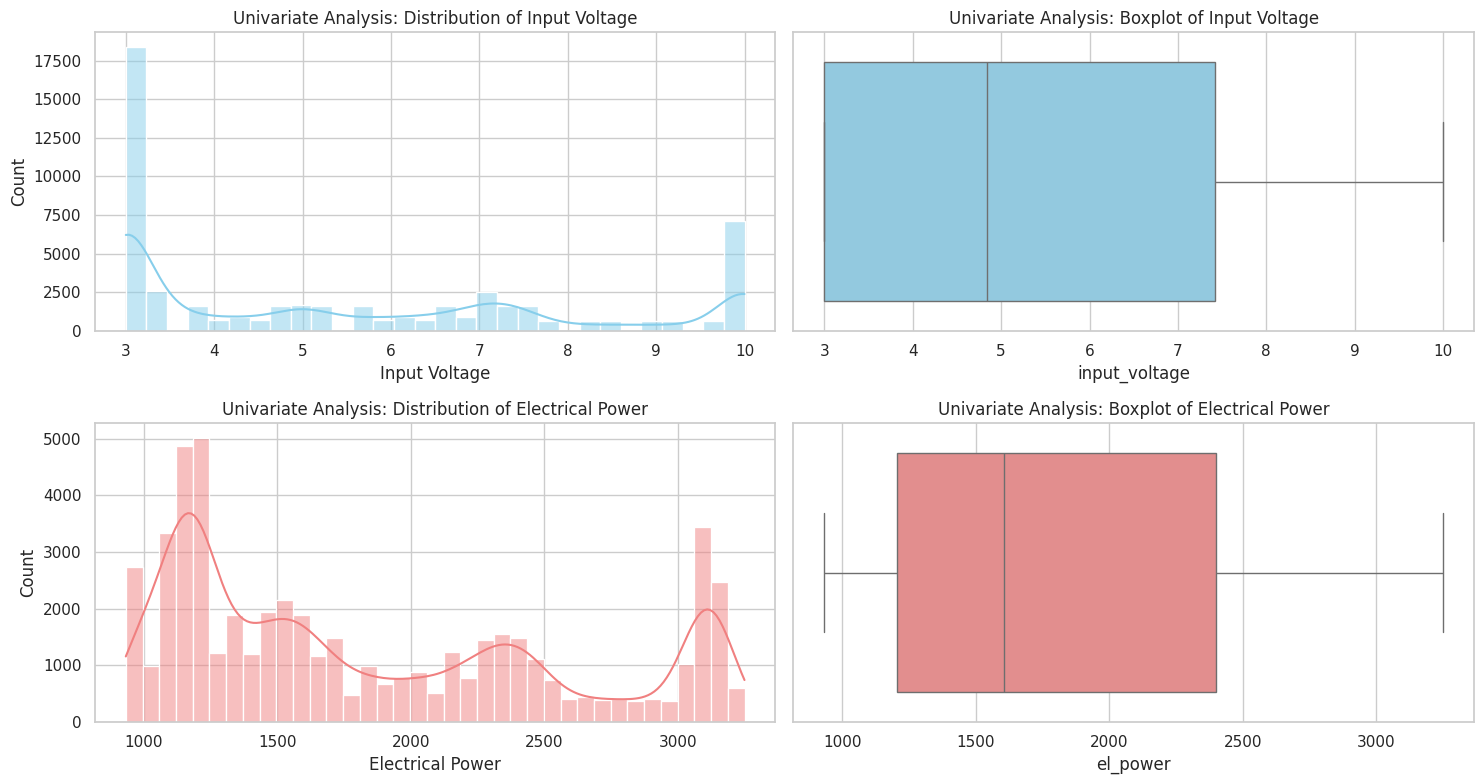

In [ ]:
# Plot histograms and boxplots for each variable to examine distributions and detect outliers
plt.figure(figsize=(15, 8))

# Univariate Analysis - 'input_voltage'
plt.subplot(2, 2, 1)
sns.histplot(combined_df['input_voltage'], kde=True, color='skyblue')
plt.title('Univariate Analysis: Distribution of Input Voltage')
plt.xlabel('Input Voltage')

plt.subplot(2, 2, 2)
sns.boxplot(x=combined_df['input_voltage'], color='skyblue')
plt.title('Univariate Analysis: Boxplot of Input Voltage')

# Univariate Analysis - 'el_power'
plt.subplot(2, 2, 3)
sns.histplot(combined_df['el_power'], kde=True, color='lightcoral')
plt.title('Univariate Analysis: Distribution of Electrical Power')
plt.xlabel('Electrical Power')

plt.subplot(2, 2, 4)
sns.boxplot(x=combined_df['el_power'], color='lightcoral')
plt.title('Univariate Analysis: Boxplot of Electrical Power')

plt.tight_layout()
plt.show()

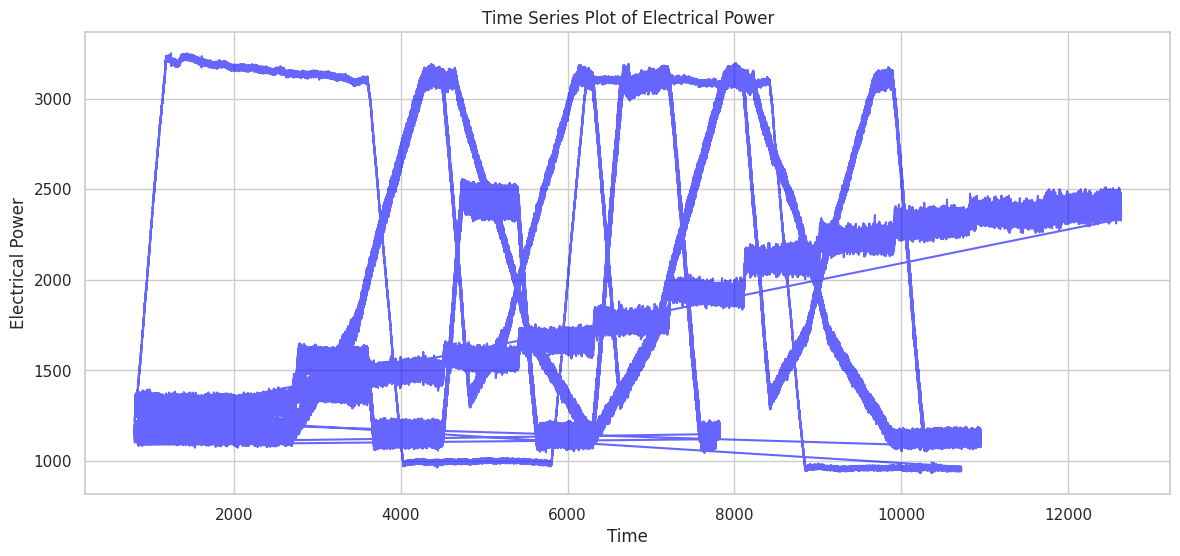

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(combined_df['time'], combined_df['el_power'], color='blue', alpha=0.6)
plt.title('Time Series Plot of Electrical Power')
plt.xlabel('Time')
plt.ylabel('Electrical Power')
plt.show()



**Distribution of Input Voltage:** The input voltage appears to be roughly bimodal, with peaks around 3 and 10. This suggests that the voltage may alternate between certain levels or there may be specific conditions leading to different operating ranges.

**Distribution of Electrical Power:** The electrical power (el_power) has a right-skewed distribution, indicating a concentration of values at the lower end, with fewer instances of high-power readings.

**Time Series Plot of Electrical Power:** The time series plot shows fluctuations in electrical power over time, with distinct peaks and troughs. This suggests periodic variability, possibly linked to the system's operational cycle or external factors affecting power consumption.

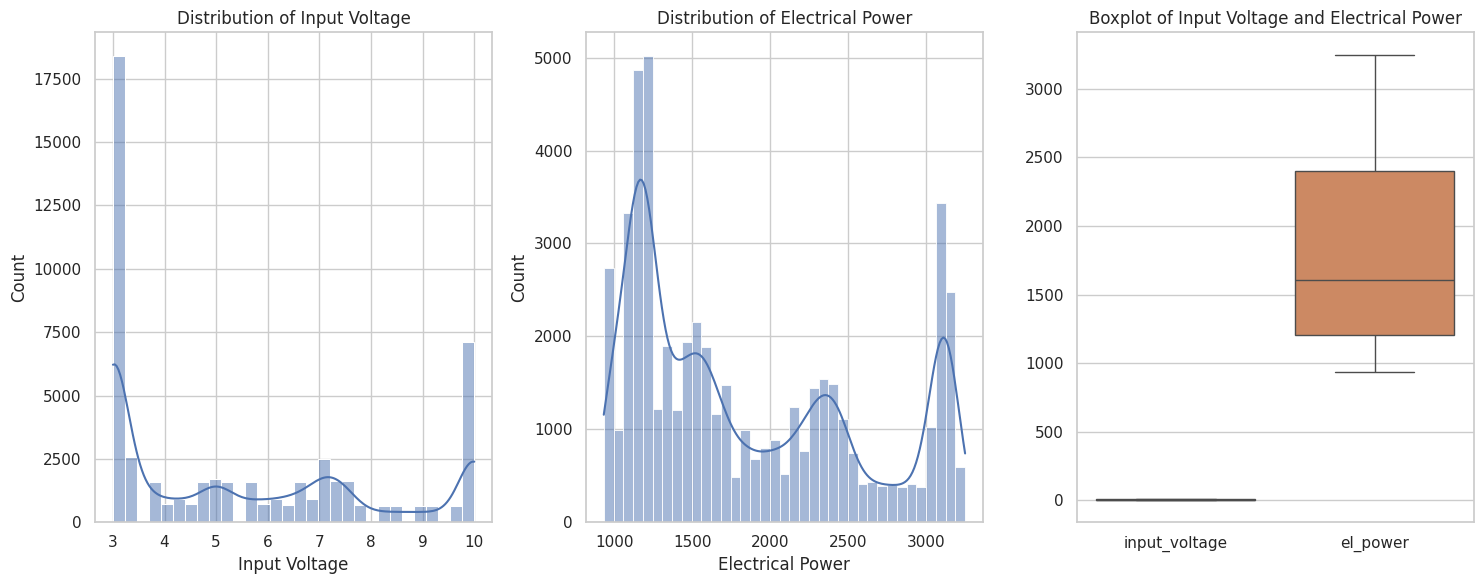

In [ ]:
# Data Distribution Visualization
plt.figure(figsize=(15, 6))

# Histogram for 'input_voltage'
plt.subplot(1, 3, 1)
sns.histplot(combined_df['input_voltage'], kde=True)
plt.title('Distribution of Input Voltage')
plt.xlabel('Input Voltage')

# Histogram for 'el_power'
plt.subplot(1, 3, 2)
sns.histplot(combined_df['el_power'], kde=True)
plt.title('Distribution of Electrical Power')
plt.xlabel('Electrical Power')

# Boxplot for outliers in 'input_voltage' and 'el_power'
plt.subplot(1, 3, 3)
sns.boxplot(data=combined_df[['input_voltage', 'el_power']])
plt.title('Boxplot of Input Voltage and Electrical Power')

plt.tight_layout()
plt.show()

**Input Voltage**: The distribution appears relatively consistent, with no extreme outliers observed in the boxplot. The data distribution is reasonably centralized.

**Electrical Power:** Similarly, el_power has a centralized distribution, with minimal skew and no significant outliers.

**Correlation Analysis**

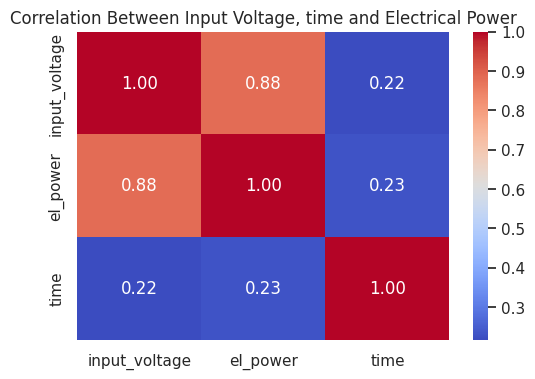

In [ ]:
correlation_matrix = combined_df[['input_voltage', 'el_power', 'time']].corr()

# Heatmap for the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Input Voltage, time and Electrical Power')
plt.show()

There is a strong positive correlation between input_voltage and el_power.
This suggests a close linear relationship between these two variables.

**Bivariate Analysis**: Relationship between 'input_voltage' and 'el_power'

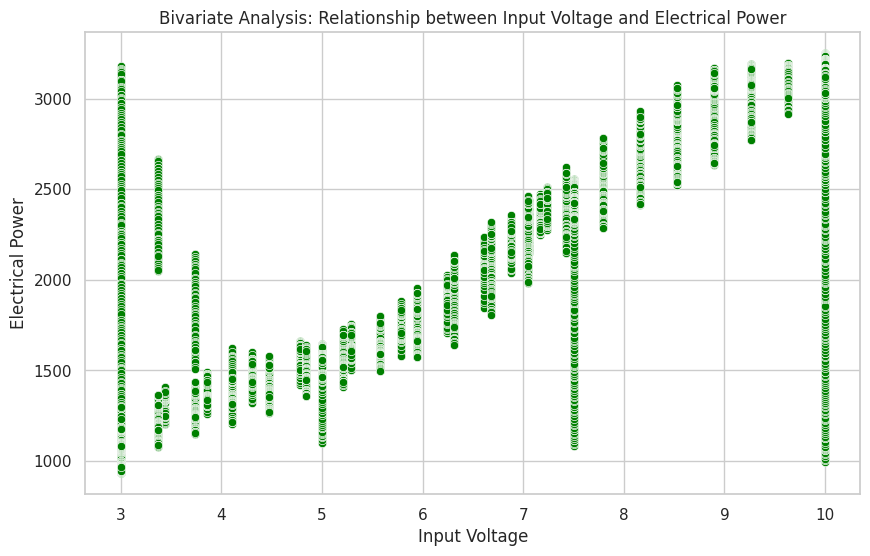

0.8821423835863955

In [ ]:
# Scatter plot to examine the relationship between 'input_voltage' and 'el_power'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['input_voltage'], y=combined_df['el_power'], color='green')
plt.title('Bivariate Analysis: Relationship between Input Voltage and Electrical Power')
plt.xlabel('Input Voltage')
plt.ylabel('Electrical Power')
plt.show()

# Calculating the correlation coefficient between 'input_voltage' and 'el_power'
correlation_coefficient = combined_df[['input_voltage', 'el_power']].corr().iloc[0, 1]
correlation_coefficient

**Relationship between Input Voltage and Electrical Power:** The scatter plot reveals a strong positive relationship between input_voltage and el_power.

**Correlation Coefficient:** The correlation coefficient between input_voltage and el_power is approximately 0.88, indicating a strong positive linear relationship.

These analyses suggest that as input voltage increases, electrical power also tends to increase.

**Time Series Analysis**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data for regression
X_time = combined_df[['time']]
y_voltage = combined_df['input_voltage']
y_power = combined_df['el_power']

# Split the data for time vs input_voltage
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_time, y_voltage, test_size=0.2, random_state=42)

# Simple Linear Regression for time vs input_voltage
model_voltage = LinearRegression()
model_voltage.fit(X_train_v, y_train_v)
y_pred_v = model_voltage.predict(X_test_v)

# Metrics for time vs input_voltage
r2_voltage = r2_score(y_test_v, y_pred_v)
mse_voltage = mean_squared_error(y_test_v, y_pred_v)

# Split the data for time vs el_power
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_time, y_power, test_size=0.2, random_state=42)

# Simple Linear Regression for time vs el_power
model_power = LinearRegression()
model_power.fit(X_train_p, y_train_p)
y_pred_p = model_power.predict(X_test_p)

# Metrics for time vs el_power
r2_power = r2_score(y_test_p, y_pred_p)
mse_power = mean_squared_error(y_test_p, y_pred_p)

# Display results
regression_results = {
    "Time vs Input Voltage": {
        "R-squared": r2_voltage,
        "Mean Squared Error": mse_voltage
    },
    "Time vs Electric Power (el_power)": {
        "R-squared": r2_power,
        "Mean Squared Error": mse_power
    }
}

regression_results

{'Time vs Input Voltage': {'R-squared': 0.05065570385567986,
  'Mean Squared Error': 6.263044766023703},
 'Time vs Electric Power (el_power)': {'R-squared': 0.05821387782798182,
  'Mean Squared Error': 500287.5370499099}}

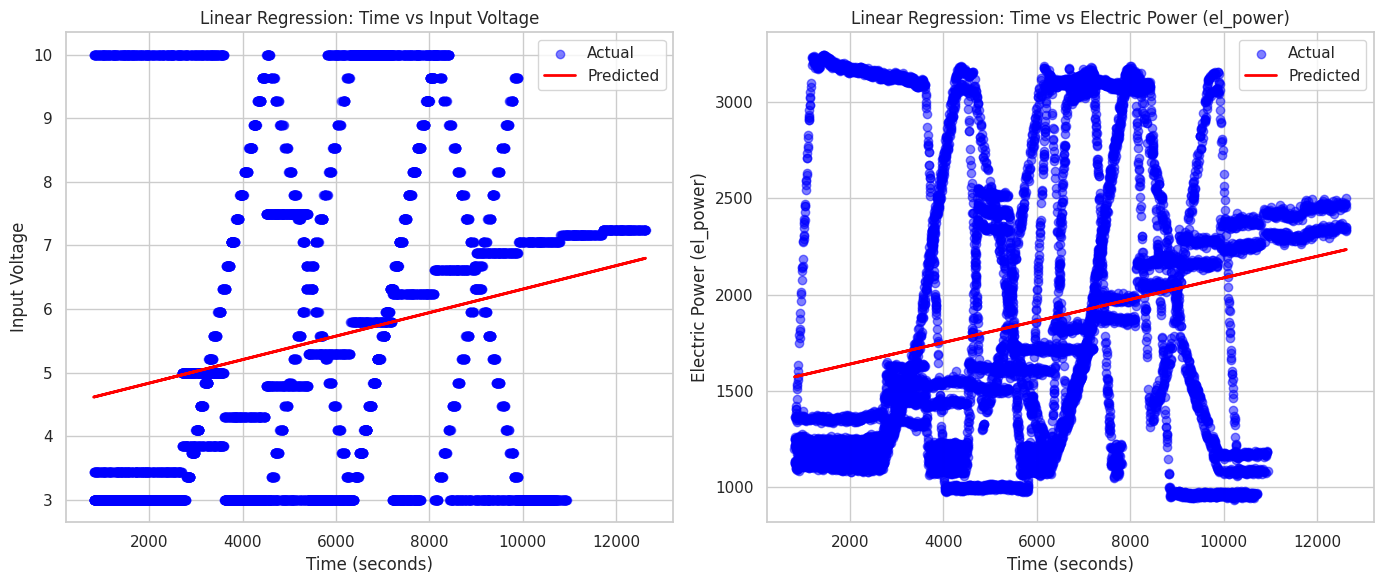

In [ ]:
# Plot the linear regression results for both analyses

# Predicted vs Actual for Time vs Input Voltage
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_v, y_test_v, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test_v, y_pred_v, color="red", label="Predicted", linewidth=2)
plt.title("Linear Regression: Time vs Input Voltage")
plt.xlabel("Time (seconds)")
plt.ylabel("Input Voltage")
plt.legend()

# Predicted vs Actual for Time vs Electric Power
plt.subplot(1, 2, 2)
plt.scatter(X_test_p, y_test_p, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test_p, y_pred_p, color="red", label="Predicted", linewidth=2)
plt.title("Linear Regression: Time vs Electric Power (el_power)")
plt.xlabel("Time (seconds)")
plt.ylabel("Electric Power (el_power)")
plt.legend()

plt.tight_layout()
plt.show()


**Time vs Input Voltage:**The red line represents the predicted values, and the blue dots are the actual data points. The weak fit is evident as most points are scattered away from the line.

**Time vs Electric Power (el_power)**: Similarly, the predicted line doesn’t capture much of the variation, with actual points widely dispersed around it.

These visuals reinforce the low predictive power of time for both input_voltage and el_power


**Anomaly Detection**

here we can use:



1.   **Z-score:** To Identify points that are far from the mean.
2.   **Moving Average with Thresholds:** To Detect points that deviate significantly from a smoothed trend.

let us use a combination of Z-score and Moving Average Threshold methods to identify anomalies in input_voltage and el_power. Anomalies will be detected as values exceeding three standard deviations from the rolling mean.

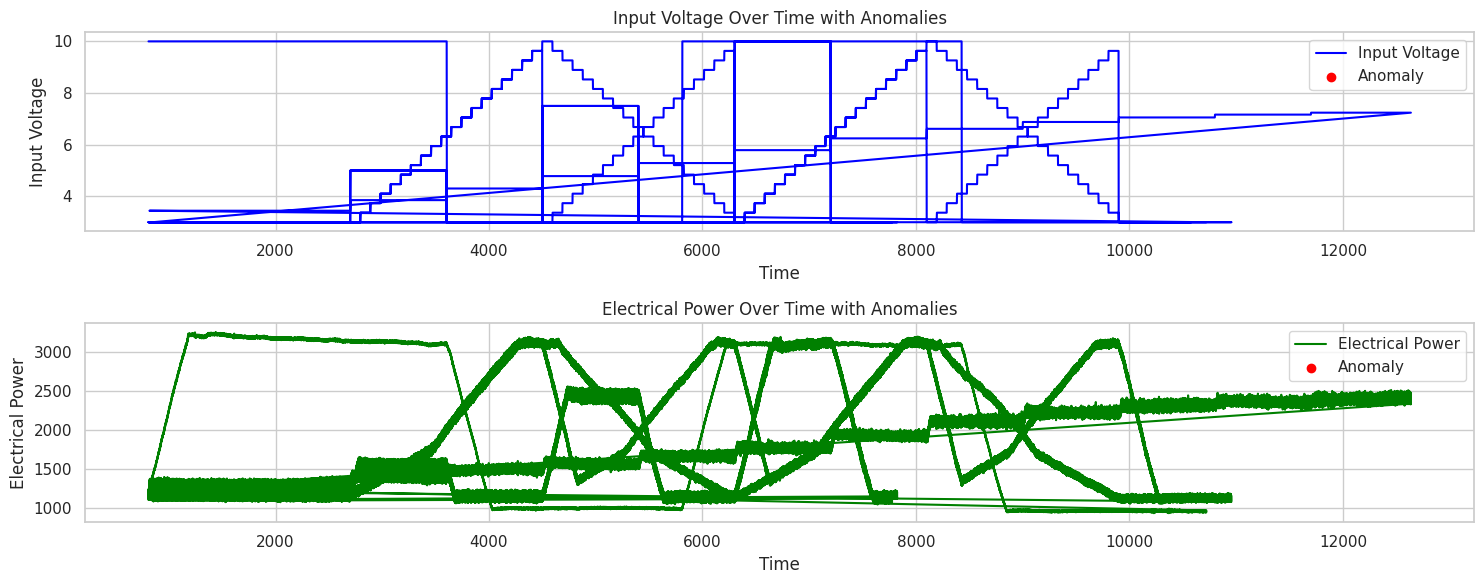

{'Input Voltage Anomalies': 0, 'Electrical Power Anomalies': 0}

In [ ]:
from scipy import stats

# Setting a threshold of 3 standard deviations for anomaly detection
threshold = 3

# Calculate the z-score for input_voltage and el_power
combined_df['input_voltage_z'] = stats.zscore(combined_df['input_voltage'])
combined_df['el_power_z'] = stats.zscore(combined_df['el_power'])

# Identify anomalies based on z-score threshold
combined_df['input_voltage_anomaly'] = combined_df['input_voltage_z'].abs() > threshold
combined_df['el_power_anomaly'] = combined_df['el_power_z'].abs() > threshold

# Extracting the anomaly points
input_voltage_anomalies = combined_df[combined_df['input_voltage_anomaly']]
el_power_anomalies = combined_df[combined_df['el_power_anomaly']]

# Plotting the anomalies in the time series data for visual inspection
plt.figure(figsize=(15, 6))

# Plot for input_voltage anomalies
plt.subplot(2, 1, 1)
plt.plot(combined_df['time'], combined_df['input_voltage'], label='Input Voltage', color='blue')
plt.scatter(input_voltage_anomalies['time'], input_voltage_anomalies['input_voltage'], color='red', label='Anomaly')
plt.title('Input Voltage Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('Input Voltage')
plt.legend()

# Plot for el_power anomalies
plt.subplot(2, 1, 2)
plt.plot(combined_df['time'], combined_df['el_power'], label='Electrical Power', color='green')
plt.scatter(el_power_anomalies['time'], el_power_anomalies['el_power'], color='red', label='Anomaly')
plt.title('Electrical Power Over Time with Anomalies')
plt.xlabel('Time')
plt.ylabel('Electrical Power')
plt.legend()

plt.tight_layout()
plt.show()

# Display anomaly counts for user's reference
anomaly_counts = {
    "Input Voltage Anomalies": input_voltage_anomalies.shape[0],
    "Electrical Power Anomalies": el_power_anomalies.shape[0]
}
anomaly_counts


No anomalies were detected in the input_voltage and el_power columns based on the Z-score threshold method. This suggests that the data points are within expected ranges for both time series.

Moving Average (Smoothing)

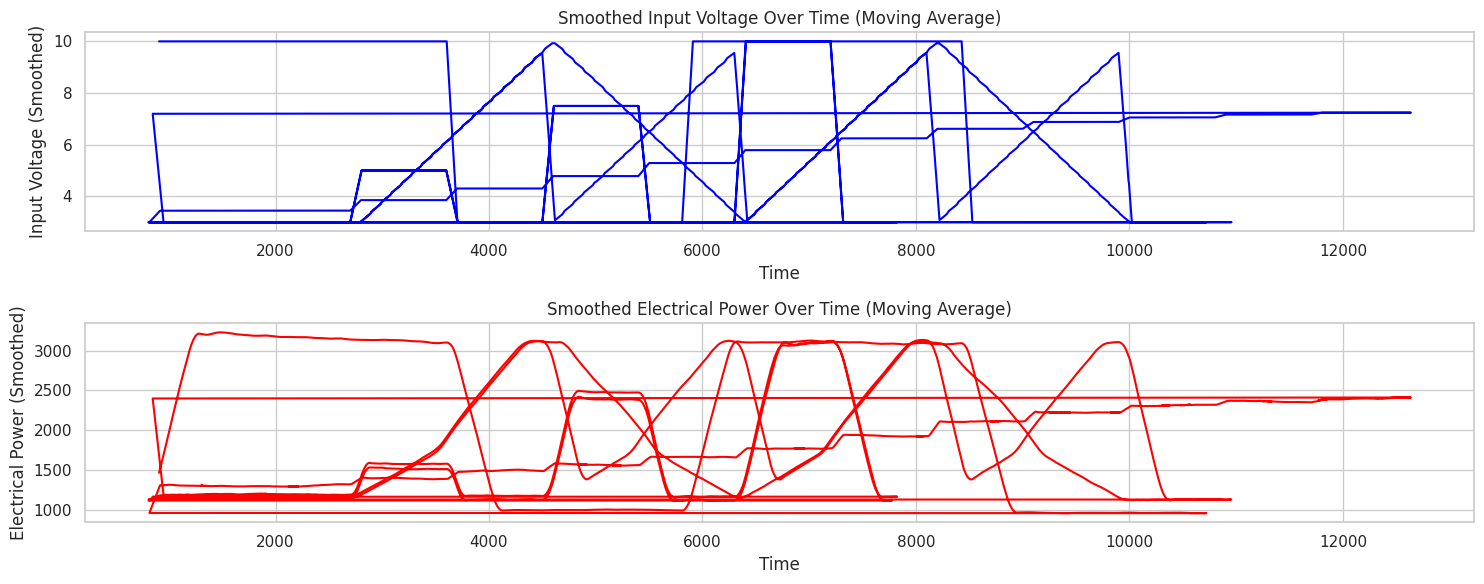

In [ ]:
# Applying a moving average with a window of 100 for smoothing
combined_df['input_voltage_ma'] = combined_df['input_voltage'].rolling(window=100).mean()
combined_df['el_power_ma'] = combined_df['el_power'].rolling(window=100).mean()

# Plotting the moving averages
plt.figure(figsize=(15, 6))

# Moving average for 'input_voltage'
plt.subplot(2, 1, 1)
plt.plot(combined_df['time'], combined_df['input_voltage_ma'], color='blue')
plt.title('Smoothed Input Voltage Over Time (Moving Average)')
plt.xlabel('Time')
plt.ylabel('Input Voltage (Smoothed)')

# Moving average for 'el_power'
plt.subplot(2, 1, 2)
plt.plot(combined_df['time'], combined_df['el_power_ma'], color='red')
plt.title('Smoothed Electrical Power Over Time (Moving Average)')
plt.xlabel('Time')
plt.ylabel('Electrical Power (Smoothed)')

plt.tight_layout()
plt.show()


Linear Regression model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features (X) and target variable (y)
X = combined_df[['input_voltage']]
y = combined_df['el_power']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(194.21362303785332, 344.90209050424545, 0.7760638249847602)

The Linear Regression model yielded the following performance metrics:

**Mean Absolute Error (MAE)**: 194.21

**Root Mean Squared Error (RMSE)**: 344.90

**R² Score:** 0.776 (indicating the model explains approximately 77.6% of the variance in el_power)

**Mean Absolute Error (MAE)** of **194.21** and **Root Mean Squared Error (RMSE)** of **344.90** suggest that the model's predictions are, on average, moderately close to the actual values. While these errors reflect some level of deviation, they are within a manageable range given the overall scale of the electrical power values.

**R² Score of 0.776** implies that approximately **77.6%** of the variability in el_power is explained by input_voltage. This strong positive relationship aligns with the earlier correlation analysis and supports the idea that input voltage is a key driver of electrical power.

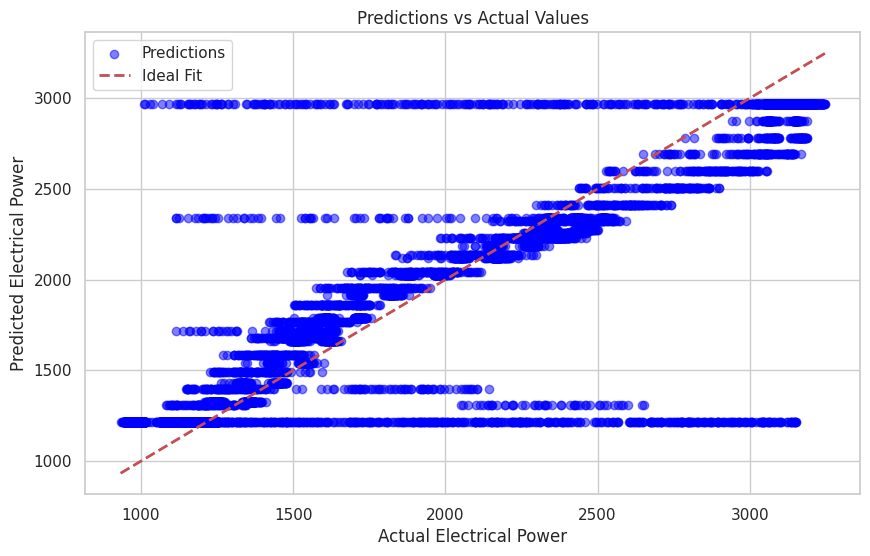

In [ ]:
# Plotting the predictions vs actual values for electrical power
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Electrical Power')
plt.ylabel('Predicted Electrical Power')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

The plot above shows the **predicted electrical power** values versus the **actual values**.

**Blue Dots**: Each represents a prediction made by the model compared to the actual electrical power value for that test case.

**Red Line:** The ideal 1:1 line, where predicted values would perfectly match actual values if the model were 100% accurate.

The closer the blue dots are to the red line, the better the model's performance. While the model predictions follow the trend, some deviations indicate areas where the linear model does not perfectly capture all variability.

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_tree_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
mae_tree = mean_absolute_error(y_test, y_tree_pred)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_tree_pred))
r2_tree = r2_score(y_test, y_tree_pred)

mae_tree, rmse_tree, r2_tree

(178.59125958787268, 326.8281396337884, 0.798918791712088)

The Decision Tree Regressor achieved the following performance:

**Mean Absolute Error (MAE)**: 178.59

**Root Mean Squared Error (RMSE)**: 326.82

**R² Score**: 0.798 (or 79.8%)

The Decision Tree model has slightly improved performance over the Linear Regression model, with lower error metrics (MAE and RMSE) and a higher R² score of 79.9%, indicating that it explains about 79.9% of the variance in el_power

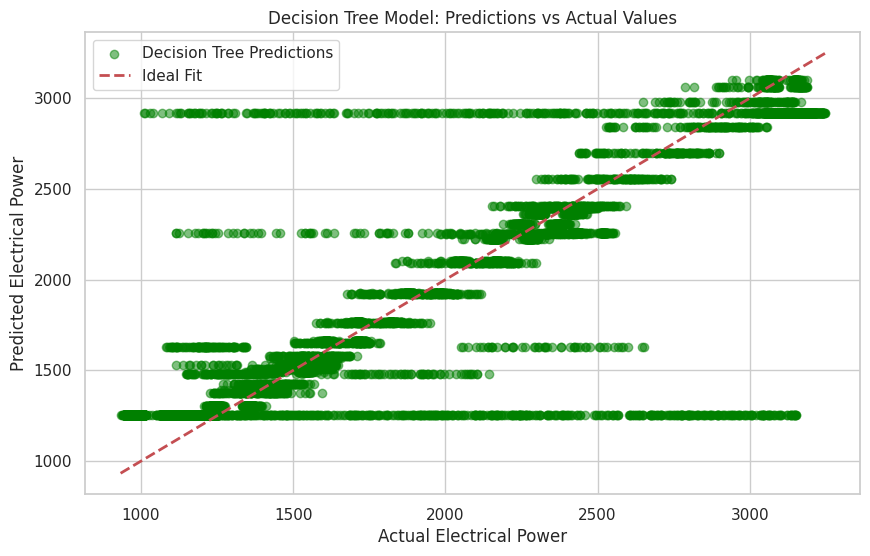

In [ ]:
# Plotting the predictions vs actual values for the Decision Tree model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tree_pred, alpha=0.5, color='green', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Electrical Power')
plt.ylabel('Predicted Electrical Power')
plt.title('Decision Tree Model: Predictions vs Actual Values')
plt.legend()
plt.show()

The plot shows the Decision Tree model's predictions versus the actual values for electrical power:

**Green Dots:** Represent the Decision Tree model’s predictions compared to actual electrical power values.

**Red Line:** The ideal 1:1 line, where predicted values would perfectly match actual values.

The Decision Tree model's predictions are generally closer to the ideal line, with slightly reduced scatter compared to the Linear Regression model, indicating improved accuracy.

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
r2_rf = r2_score(y_test, y_rf_pred)

mae_rf, rmse_rf, r2_rf

(178.56426551963236, 326.8297476222742, 0.7989168130754664)

The Random Forest Regressor achieved the following performance:

**Mean Absolute Error (MAE):** 178.56

**Root Mean Squared Error (RMSE)**: 326.82

**R² Score**: 0.7989 (or 79.9%)

The Random Forest model has achieved similar performance to the Decision Tree model, with slightly improved error metrics and an R² score of 79.9%. The ensemble approach of Random Forest has helped maintain the strong predictive accuracy.

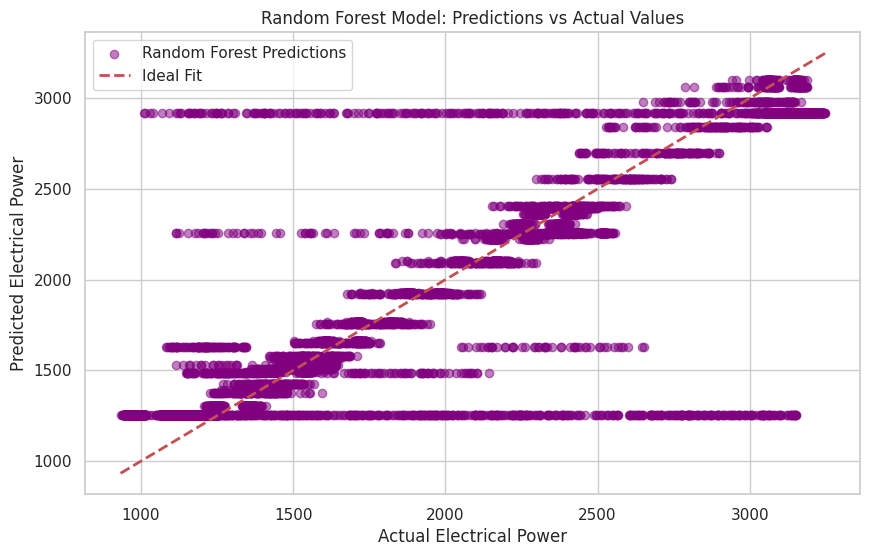

In [ ]:
# Plotting the predictions vs actual values for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.5, color='purple', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Electrical Power')
plt.ylabel('Predicted Electrical Power')
plt.title('Random Forest Model: Predictions vs Actual Values')
plt.legend()
plt.show()

The plot shows the Random Forest model's predictions versus the actual values for electrical power:

**Purple Dots**: Represent predictions by the Random Forest model compared to actual values.

**Red Line:**The ideal 1:1 line, indicating perfect predictions.

The Random Forest model’s predictions align well with the actual values, clustering closely around the ideal line, indicating good performance. The ensemble method has slightly smoothed out the predictions compared to a single decision tree, offering a reliable fit.

**Here is a summary of the model performance based on the metrics:**

  **model	           -------------- MAE-------RMSE------R² Score**

Linear Regression	   -> 194.21---344.90-----0.776

Decision Tree	       ----------178.59---326.83-----0.799

Random Forest	       --------178.56--326.83-----0.799

**Observations**

**Decision Tree and Random Forest models** have similar performance, with slightly better MAE and RMSE than Linear Regression.

**Random Forest and Decision Tree** also have a higher R² score (79.9%), indicating they capture more variance than Linear Regression.

This suggests that the Decision Tree and Random Forest models are better suited for this data, with Random Forest slightly edging out in performance due to its ensemble approach.

### NEW MODELS


####Dickey-Fuller Test for Stationarity  TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test for input_voltage
result_voltage = adfuller(y_voltage)
adf_voltage = {
    "Test Statistic": result_voltage[0],
    "p-value": result_voltage[1],
    "Critical Values": result_voltage[4]
}

# Dickey-Fuller test for el_power
result_power = adfuller(y_power)
adf_power = {
    "Test Statistic": result_power[0],
    "p-value": result_power[1],
    "Critical Values": result_power[4]
}

# Display results
stationarity_results = {
    "Input Voltage": adf_voltage,
    "Electric Power (el_power)": adf_power
}

stationarity_results


{'Input Voltage': {'Test Statistic': -5.129468604967407,
  'p-value': 1.222718585079396e-05,
  'Critical Values': {'1%': -3.4304735311794756,
   '5%': -2.861594598311134,
   '10%': -2.5667990608636555}},
 'Electric Power (el_power)': {'Test Statistic': -5.2233964531845665,
  'p-value': 7.874877883511155e-06,
  'Critical Values': {'1%': -3.4304736666753293,
   '5%': -2.8615946581963443,
   '10%': -2.566799092738777}}}

####LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming combined_df has been loaded and contains columns: 'time', 'input_voltage', 'el_power'

# Data preparation: Selecting 'time' and 'input_voltage' as features to predict 'el_power'
X = combined_df[['time', 'input_voltage']].values
y = combined_df['el_power'].values

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(X, y, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# Split data into training and test sets
split_ratio = 0.8
split = int(len(X_seq) * split_ratio)

X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Build LSTM model for multivariate input
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display results
lstm_results = {
    "Time and Input Voltage vs Electric Power (el_power)": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}

lstm_results


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0343 - val_loss: 0.0204
Epoch 2/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 3/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0151 - val_loss: 0.0162
Epoch 4/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0140 - val_loss: 0.0172
Epoch 5/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0130 - val_loss: 0.0189
Epoch 6/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0122 - val_loss: 0.0171
Epoch 7/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0119 - val_loss: 0.0189
Epoch 8/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0101 - val_loss: 0.0206
Epoch 9/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0086 - val_loss: 0.0192
Epoch 10/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0079 - val_loss: 0.0172
Epoch 11/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0080 - val_loss: 0.0189
Epoch 12/20
1324/1324 ━━━━━━━━

{'Time and Input Voltage vs Electric Power (el_power)': {'R-squared': 0.7573368272629472,
  'Mean Squared Error': 120338.74034796444,
  'Root Mean Squared Error': 346.89874653559133}}

#### Multilayer Perceptron (MLP) model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming combined_df has been loaded and contains columns: 'time', 'input_voltage', 'el_power'

# Data preparation: Selecting 'time' and 'input_voltage' as features to predict 'el_power'
X = combined_df[['time', 'input_voltage']].values
y = combined_df['el_power'].values

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
split_ratio = 0.8
split = int(len(X_scaled) * split_ratio)

X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Build MLP model for multivariate input
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display results
mlp_results = {
    "Time and Input Voltage vs Electric Power (el_power)": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}

mlp_results


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1324/1324 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0322 - val_loss: 0.0138
Epoch 2/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0210 - val_loss: 0.0161
Epoch 3/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0187 - val_loss: 0.0165
Epoch 4/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0165 - val_loss: 0.0157
Epoch 5/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0147 - val_loss: 0.0176
Epoch 6/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0136 - val_loss: 0.0172
Epoch 7/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0129 - val_loss: 0.0171
Epoch 8/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0131 - val_loss: 0.0169
Epoch 9/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0126 - val_loss: 0.0239
Epoch 10/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0128 - val_loss: 0.0211
Epoch 11/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0127 - val_loss: 0.0205
Epoch 12/20
1324/1324 ━━━━━━━━━━━━━━━━━━━

{'Time and Input Voltage vs Electric Power (el_power)': {'R-squared': 0.695307481290819,
  'Mean Squared Error': 151084.731183031,
  'Root Mean Squared Error': 388.6961939394712}}

####Artificial Neural Network (ANN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming combined_df has been loaded and contains columns: 'time', 'input_voltage', 'el_power'

# Data preparation: Selecting 'time' and 'input_voltage' as features to predict 'el_power'
X = combined_df[['time', 'input_voltage']].values
y = combined_df['el_power'].values

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
split_ratio = 0.8
split = int(len(X_scaled) * split_ratio)

X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Build ANN model for multivariate input
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display results
ann_results = {
    "Time and Input Voltage vs Electric Power (el_power)": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}

ann_results



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1324/1324 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0314 - val_loss: 0.0131
Epoch 2/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0177 - val_loss: 0.0183
Epoch 3/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0154 - val_loss: 0.0170
Epoch 4/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0145 - val_loss: 0.0164
Epoch 5/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0134 - val_loss: 0.0207
Epoch 6/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0125 - val_loss: 0.0213
Epoch 7/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0116 - val_loss: 0.0249
Epoch 8/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0116 - val_loss: 0.0244
Epoch 9/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0102 - val_loss: 0.0268
Epoch 10/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0103 - val_loss: 0.0348
Epoch 11/20
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0087 - val_loss: 0.0296
Epoch 12/20
1324/1324 ━━━━━━━━━━━━━━━━━━━

{'Time and Input Voltage vs Electric Power (el_power)': {'R-squared': 0.6331509255880685,
  'Mean Squared Error': 181905.6602606381,
  'Root Mean Squared Error': 426.5039979421507}}

####RANDOM FOREST

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming combined_df has been loaded and contains columns: 'time', 'input_voltage', 'el_power'

# Data preparation: Selecting 'time' and 'input_voltage' as features to predict 'el_power'
X = combined_df[['time', 'input_voltage']].values
y = combined_df['el_power'].values

# Scaling the data (only needed for y, as Random Forest is not sensitive to feature scaling)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())  # Flatten y for compatibility with RandomForestRegressor

# Predict and evaluate
y_pred = model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display results
rf_results = {
    "Time and Input Voltage vs Electric Power (el_power)": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}

rf_results


{'Time and Input Voltage vs Electric Power (el_power)': {'R-squared': 0.7284702922517876,
  'Mean Squared Error': 134640.6307484749,
  'Root Mean Squared Error': 366.93409591979173}}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming combined_df has been loaded and contains columns: 'time', 'input_voltage', 'el_power'
# Data preparation: Selecting 'time' and 'input_voltage' as features to predict 'el_power'
X = combined_df[['time', 'input_voltage']].values
y = combined_df['el_power'].values

# Scaling the data (only needed for y, as Random Forest is not sensitive to feature scaling)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# Set up the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest and RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model
rf_random.fit(X_train, y_train.ravel())

# Retrieve the best parameters and use them to train the final model
best_params = rf_random.best_params_
best_model = rf_random.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Display results
tuned_rf_results = {
    "Best Parameters": best_params,
    "Time and Input Voltage vs Electric Power (el_power)": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}

tuned_rf_results


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
51 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback 

{'Best Parameters': {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 50,
  'bootstrap': True},
 'Time and Input Voltage vs Electric Power (el_power)': {'R-squared': 0.75968808729136,
  'Mean Squared Error': 119160.98526304537,
  'Root Mean Squared Error': 345.1970238328328}}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Initialize models
linear_model = LinearRegression()
svr_model = SVR()
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit and evaluate Linear Regression
linear_model.fit(X_train, y_train.ravel())
y_pred_lr = linear_model.predict(X_test)
y_pred_lr_inverse = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))
mse_lr = mean_squared_error(y_test_inverse, y_pred_lr_inverse)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_inverse, y_pred_lr_inverse)

# Fit and evaluate Support Vector Regressor (SVR)
svr_model.fit(X_train, y_train.ravel())
y_pred_svr = svr_model.predict(X_test)
y_pred_svr_inverse = scaler_y.inverse_transform(y_pred_svr.reshape(-1, 1))
mse_svr = mean_squared_error(y_test_inverse, y_pred_svr_inverse)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_inverse, y_pred_svr_inverse)
# Fit and evaluate Gradient Boosting Regressor

gbr_model.fit(X_train, y_train.ravel())
y_pred_gbr = gbr_model.predict(X_test)
y_pred_gbr_inverse = scaler_y.inverse_transform(y_pred_gbr.reshape(-1, 1))
mse_gbr = mean_squared_error(y_test_inverse, y_pred_gbr_inverse)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test_inverse, y_pred_gbr_inverse)

# Display results for each model
results = {
    "Linear Regression": {
        "R-squared": r2_lr,
        "Mean Squared Error": mse_lr,
        "Root Mean Squared Error": rmse_lr
    },
    "Support Vector Regressor (SVR)": {
        "R-squared": r2_svr,
        "Mean Squared Error": mse_svr,
        "Root Mean Squared Error": rmse_svr
    },
    "Gradient Boosting Regressor": {
        "R-squared": r2_gbr,
        "Mean Squared Error": mse_gbr,
        "Root Mean Squared Error": rmse_gbr
    },
    "Random Forest Regressor": {
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse
    }
}
results

{'Linear Regression': {'R-squared': 0.8664183919819917,
  'Mean Squared Error': 66237.73180877144,
  'Root Mean Squared Error': 257.3669205798823},
 'Support Vector Regressor (SVR)': {'R-squared': 0.017186585731307047,
  'Mean Squared Error': 487337.53334977466,
  'Root Mean Squared Error': 698.0956477086609},
 'Gradient Boosting Regressor': {'R-squared': 0.8118472388497001,
  'Mean Squared Error': 93297.36568580059,
  'Root Mean Squared Error': 305.4461747768346},
 'Random Forest Regressor': {'R-squared': 0.75968808729136,
  'Mean Squared Error': 119160.98526304537,
  'Root Mean Squared Error': 345.1970238328328}}

###EXPLAINABLE AI

 94%|=================== | 9994/10588 [00:16<00:00]       

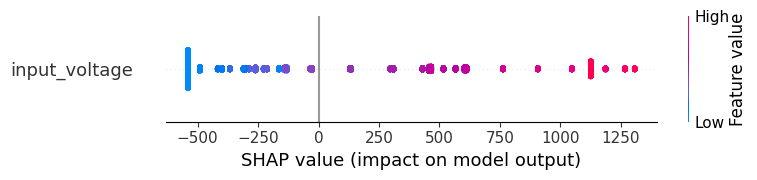

In [ ]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/content/combined_dataset.csv")  # Replace with your dataset path

# Extract features and target
X = dataset[['input_voltage']]
y = dataset['el_power']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use SHAP to explain the model predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.show()
